## Q.2) Salary_hike -> Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA 
and do necessary transformations and select the best model using  Python.



In [2]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
salary_data = pd.read_csv('Salary_Data.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA 
Initial Analysis

In [4]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
salary_data.shape

(30, 2)

In [8]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [9]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

**there are no null values in our data**

In [10]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


* **average experience and average salary is 5.31 & 76003.00 respectively**
* **mininum experience is about 1.1 years and maximum experience is about 10.5 years**
* **mininum salary is 37731 and maximum salary is 122391**

In [17]:
cor =salary_data.corr()
cor                         #@correlation statement

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

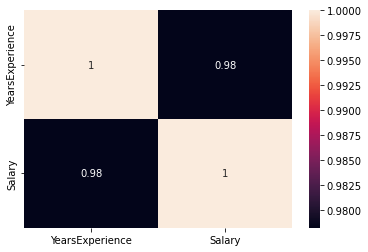

In [18]:
sns.heatmap(cor,annot=True)

 **there is high positive correlation between experience and salary**

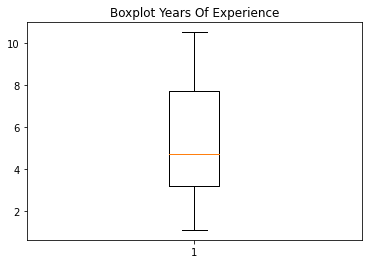

In [23]:
plt.boxplot(x='YearsExperience',data=salary_data)
plt.title('Boxplot Years Of Experience')
plt.show()

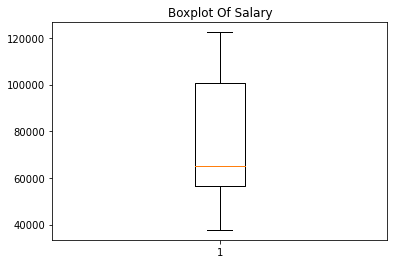

In [24]:
plt.boxplot(x='Salary',data=salary_data)
plt.title('Boxplot Of Salary')
plt.show()

**there are no outliers in our data**

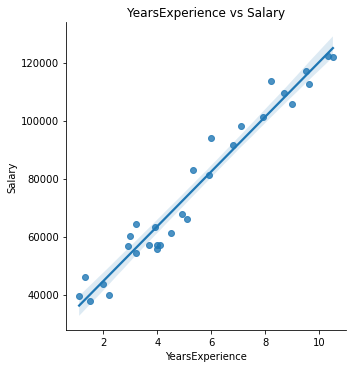

In [25]:
#Linearity
sns.lmplot(x='YearsExperience',y='Salary',data=salary_data)
plt.title('YearsExperience vs Salary')
plt.show()

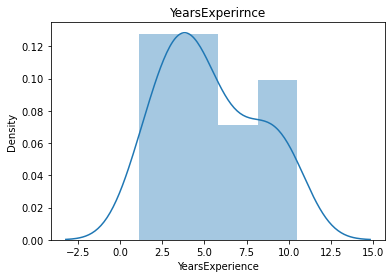

In [29]:
#Normality
sns.distplot(salary_data['YearsExperience'])
plt.title('YearsExperirnce')
plt.show()

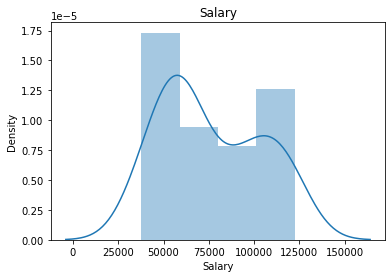

In [30]:
sns.distplot(salary_data['Salary'])
plt.title('Salary')
plt.show()

**from above plot we can say that most of the data lie within group 50k - 100k**

# Model Building || Model Training

In [31]:
salary_data=salary_data.rename(columns={"YearsExperience":"X",'Salary':'y'})
salary_data.head()

,X,y
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [33]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [34]:
model = smf.ols('y~X',data=salary_data).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           1.14e-20
Time:                        13:20:27   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
X           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#parameters
model.params

Intercept    25792.200199
X             9449.962321
dtype: float64

In [37]:
#t-values and p-values
print(model.tvalues ,'\n', model.pvalues)

Intercept    11.346940
X            24.950094
dtype: float64 
 Intercept    5.511950e-12
X            1.143068e-20
dtype: float64


In [38]:
(model.rsquared,model.rsquared_adj)
#R squared values

(0.9569566641435086, 0.9554194021486339)

**since our r-square value is 0.957** 

**hence, higher r-squared indicates a better fit for the model.**


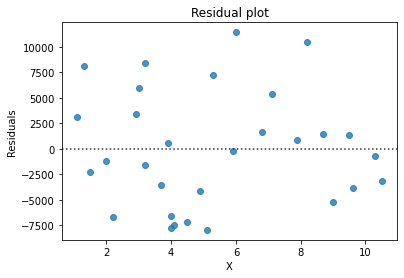

In [39]:
#Residual Plot
sns.residplot(x=salary_data['X'],y=model.resid)
plt.title('Residual plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()

By observing the above Residual Plot, we can say that the residual plot has **random pattern**, 
that indicating a good fit for a linear model.

### Now we see that what r-square value and residual plot show us for transformed equations

# By Using Different Transformations

# 1) Log Tranformation

In [40]:
salary_data.head()

,X,y
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [41]:
salary_data['log_x'] = np.log(salary_data['X'])

In [42]:
salary_data.head()

,X,y,log_x
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


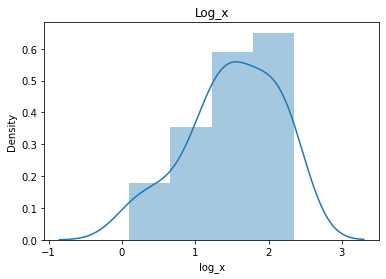

In [43]:
sns.distplot(salary_data['log_x'])
plt.title("Log_x")
plt.show()

### Model Building || Model Training

In [44]:
model_1 = smf.ols('y~log_x',data=salary_data).fit()

In [47]:
model_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           3.25e-13
Time:                        13:29:55   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_x       4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
model_1.rsquared

0.853888882875697

        This r-square value is less than the r-square of the model from raw data.

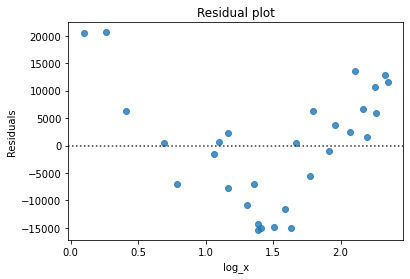

In [49]:
#Residual  Plot
sns.residplot(x=salary_data['log_x'],y=model_1.resid)
plt.title('Residual plot')
plt.xlabel('log_x')
plt.ylabel('Residuals')
plt.show()

The above residual plot show **U-shape**,which indicates our residual are **Non-random**.

# Quadratic model (SQRT Transformation)

In [50]:
salary_data['sqrt_x'] = np.sqrt(salary_data['X'])

In [51]:
salary_data.head()

,X,y,log_x,sqrt_x
0,1.1,39343.0,0.095310,1.048809
1,1.3,46205.0,0.262364,1.140175
2,1.5,37731.0,0.405465,1.224745
3,2.0,43525.0,0.693147,1.414214
4,2.2,39891.0,0.788457,1.483240


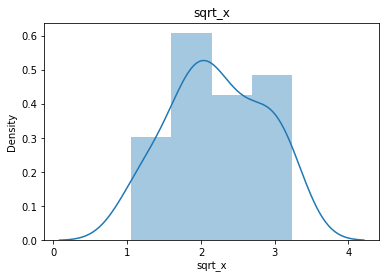

In [52]:
sns.distplot(salary_data['sqrt_x'])
plt.title("sqrt_x")
plt.show()

### Model Building || Model Training

In [53]:
model_2 = smf.ols('y~sqrt_x',data=salary_data).fit()

In [54]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           8.57e-18
Time:                        13:32:17   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
sqrt_x       4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
model_2.rsquared

0.9310009544993526

This r-square value is also less than the r-square of the model from raw data.

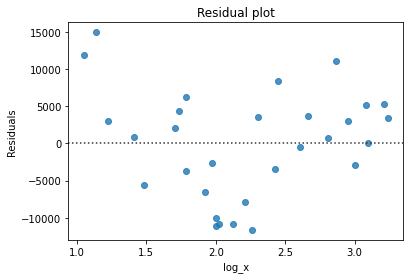

In [56]:
#Residual Plot
sns.residplot(x=salary_data['sqrt_x'],y=model_2.resid)
plt.title('Residual plot')
plt.xlabel('log_x')
plt.ylabel('Residuals')
plt.show()

The above residual plot show **U-shape**,which indicates our residual are **Non-random**.

# 3) Reciprocal model (1/y) Transformation

**In this we are going to transform the dependent variable**

In [57]:
salary_data['res_proc_y']  = 1/salary_data['y']

In [58]:
salary_data.head()

,X,y,log_x,sqrt_x,res_proc_y
0,1.1,39343.0,0.095310,1.048809,0.000025
1,1.3,46205.0,0.262364,1.140175,0.000022
2,1.5,37731.0,0.405465,1.224745,0.000027
3,2.0,43525.0,0.693147,1.414214,0.000023
4,2.2,39891.0,0.788457,1.483240,0.000025


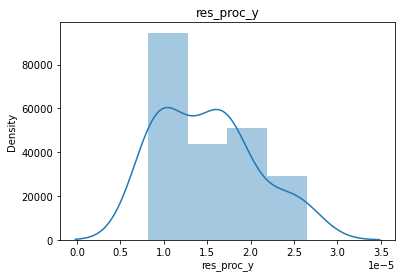

In [59]:
sns.distplot(salary_data['res_proc_y'])
plt.title("res_proc_y")
plt.show()

### Model Building || Model Training

In [60]:
model_3 = smf.ols('res_proc_y~X',data=salary_data).fit()

In [61]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             res_proc_y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     173.2
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           1.63e-13
Time:                        13:34:43   Log-Likelihood:                 350.83
No. Observations:                  30   AIC:                            -697.7
Df Residuals:                      28   BIC:                            -694.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.454e-05    8.2e-07     29.913      0.000    2.29e-05    2.62e-05
X          -1.799e-06   1.37e-07    -13.162      0.000   -2.08e-06   -1.52e-06
==============================================================================
Omnibus:                        1.760   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                1.380
Skew:                           0.516   Prob(JB):                        0.502
Kurtosis:                       2.802   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
model_3.rsquared

0.8608672473082564

This r-square value is also less than the r-square of the model from raw data.

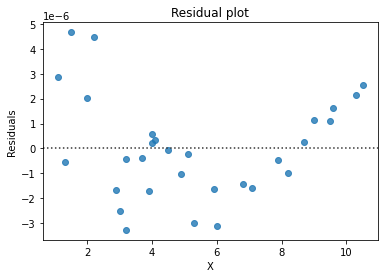

In [63]:
#Residual Plot
sns.residplot(x=salary_data['X'],y=model_3.resid)
plt.title('Residual plot')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()

In [65]:
The above residual plot shows little bit **U-shape**,which indicates our residual are **Non-random**.

SyntaxError: invalid syntax (Temp/ipykernel_20228/534191174.py, line 1)

## Model Selection

#Now by comparing r-square of all models,

we can say that the models which are fitted by using transformation

are not so good as compare to our model from raw data(original data)

Hence , we select our first model for further calculation¶

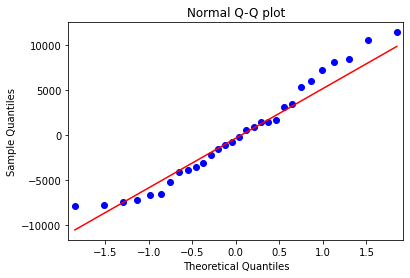

In [66]:
#Normal Q-Q Plot
sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot')
plt.show()

In [67]:
#for prediction
test_data=salary_data['X']

In [68]:
predict_y = model.predict(test_data)
print(predict_y.head())

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64


In [69]:
    actual = salary_data['y']
actual.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: y, dtype: float64

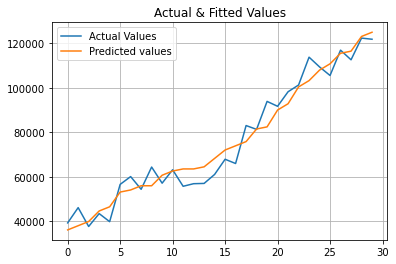

In [70]:
#plot for actual and fitted  values
plt.plot(actual,label='Actual Values')
plt.plot(predict_y,label='Predicted values')
plt.title('Actual & Fitted Values')
legend=plt.legend()
plt.grid(True)
plt.show()

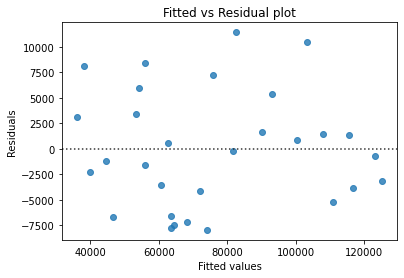

In [71]:
#Residual Vs Fitted Values Plot
sns.residplot(x=predict_y,y=model.resid)
plt.title('Fitted vs Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

##### 
This plot looks good in that the variance is roughly the same all the way across and
there are no worrisome patterns.there seems to be no difficulties with the model.